<a href="https://colab.research.google.com/github/sucheerarighthere/bsc_dpdm22/blob/main/classification_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()

import matplotlib.pyplot as plt

In [14]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

<Figure size 432x288 with 0 Axes>

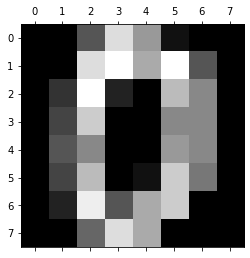

In [16]:
plt.gray()
plt.matshow(digits.images[0])

<Figure size 432x288 with 0 Axes>

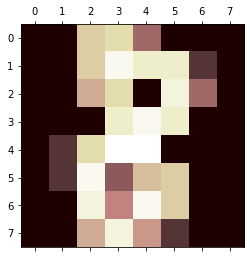

In [18]:
ind=28
plt.pink()
plt.matshow(digits.images[ind])

##  Quiz 3 march

1.   แบ่ง data ออกเป็น 80train 20 test โดยใช้ random_state = 9
2.   หา parameters ที่ดีที่สุด (K (1,3,5))distance_weighted(yes/no) ด้วย 10-fold-cross-valkidation
3. test parameters ที่ดีที่สุดกับ test data



In [20]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

## 1 set test set train

In [22]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load the digits dataset
digits = load_digits()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=2)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1437, 64) (1437,)
Testing set shape: (360, 64) (360,)


## 2 with distance_weighted

In [23]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Load the digits dataset
digits = load_digits()

# Define the distance-weighted k-NN classifier with different values of k
k_values = [1, 3, 5]
classifiers = [KNeighborsClassifier(n_neighbors=k, weights='distance') for k in k_values]

# Perform 10-fold cross-validation for each classifier
for i, clf in enumerate(classifiers):
    scores = cross_val_score(clf, digits.data, digits.target, cv=10)
    print("K =", k_values[i], "Accuracy:", scores.mean())

K = 1 Accuracy: 0.9749627560521414
K = 3 Accuracy: 0.9771849782743638
K = 5 Accuracy: 0.9716294227188081


### without distance_weighted

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Load the digits dataset
digits = load_digits()

# Define the k values to use
k_values = [1, 3, 5]

# Perform 10-fold cross-validation for each value of k
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    scores = cross_val_score(clf, digits.data, digits.target, cv=10)
    print("K =", k, "Accuracy:", scores.mean())

K = 1 Accuracy: 0.9749627560521414
K = 3 Accuracy: 0.9766325263811299
K = 5 Accuracy: 0.9716294227188081


with dw

K = 1 Accuracy: 0.9749627560521414

K = 3 Accuracy: 0.9771849782743638

K = 5 Accuracy: 0.9716294227188081

without dw

K = 1 Accuracy: 0.9749627560521414

K = 3 Accuracy: 0.9766325263811299

K = 5 Accuracy: 0.9716294227188081

# เลือก k 3 with distance weighted


test parameters ที่ดีที่สุดกับ test data

In [28]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=2)

# Fit a k-NN classifier with k=3 and distance-weighted voting
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
clf.fit(X_train, y_train)

# Predict the class labels of the test set
pred = clf.predict(X_test)

# Compute the accuracy of the classifier
acc = clf.score(X_test, y_test)

In [29]:
acc

0.9833333333333333